In [84]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [85]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from src.fileutils import PROJECT_ROOT
from src.orientation.orientation_estimation import OrientationEstimation

In [86]:
model_path = PROJECT_ROOT / "models" / "doe" / "spindoe.ckpt"
use_gpu = False
orientation_estimator = OrientationEstimation(model_path, use_gpu)

Lightning automatically upgraded your loaded checkpoint from v1.9.3 to v2.2.1. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\agpri\OneDrive\Documents\GitHub\PingPongTracking\models\doe\spindoe.ckpt`


Saving hyperparmeters
DOE  initiated


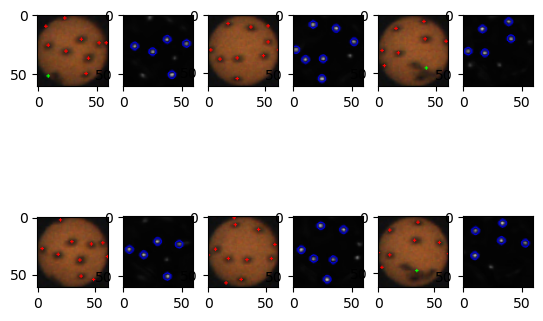

In [87]:
doe_test_images_dir = PROJECT_ROOT / "data" / "doe" / "test"
doe_test_images = list(doe_test_images_dir.glob("**/*.png"))


rdm_idx = np.random.choice(np.arange(len(doe_test_images)), 6, replace=False)
rdm_idx = np.arange(6)
aug_imgs = []
heatmaps = []
imgs = []
i = 0
for idx in rdm_idx:
    img = cv2.imread(str(doe_test_images[idx]))
    img = cv2.cvtColor(
        img, cv2.COLOR_BGR2RGB
    )
    imgs.append(img)
    rot, aug_img, heatmap = orientation_estimator.doe.debug(img)
    heatmaps.append(heatmap)
    aug_imgs.append(aug_img)

    
fig, axs = plt.subplots(2, 6)
for i in range(6):
    axs[i % 2, 2 * (i % 3)].imshow(aug_imgs[i])
    axs[i % 2, 2 * (i % 3) + 1].imshow(heatmaps[i])

plt.show()


In [88]:
white_test_image_path = PROJECT_ROOT / "data" / "orientation_images" / "white_ball_doe_1.png"
img = cv2.imread(str(white_test_image_path))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

rot, preprocessed_img, aug_img, heatmap = orientation_estimator.estimate_orientation_with_doe_debug(
        image=img,
        ball_mask=None,
        ball_center_x=img.shape[0]//2,
        ball_center_y=img.shape[1]//2,
        ball_radius=img.shape[0]//2,
    )

plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(preprocessed_img)
plt.title('Preprocessed Image')

plt.subplot(1, 4, 3)
plt.imshow(heatmap)
plt.title('Heatmap')

plt.subplot(1, 4, 4)
plt.imshow(aug_img)
plt.title('Augmented Image')

plt.show()

AttributeError: 'OrientationEstimation' object has no attribute 'estimate_orientation_with_doe_debug'